In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import seaborn as sns
import time
from datetime import datetime
from pytz import timezone
from statsmodels.distributions.empirical_distribution import ECDF

In [3]:
df = pd.read_csv("Forecast.csv",parse_dates=True)

In [4]:
df.tail()

,product,date,city,sales
4795,SECF,11-01-2017,Delhi,5837
4796,SECF,12-01-2017,Delhi,7451
4797,SECF,01-01-2018,Delhi,7712
4798,SECF,02-01-2018,Delhi,31525
4799,SECF,03-01-2018,Delhi,36136


In [5]:
df['Date'] = pd.to_datetime(df['date'])

In [6]:
#df = df[df.Date < pd.to_datetime('2018-01-01')]

In [7]:
df.tail()

,product,date,city,sales,Date
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01
4797,SECF,01-01-2018,Delhi,7712,2018-01-01
4798,SECF,02-01-2018,Delhi,31525,2018-02-01
4799,SECF,03-01-2018,Delhi,36136,2018-03-01


In [8]:
df.tail()

,product,date,city,sales,Date
4795,SECF,11-01-2017,Delhi,5837,2017-11-01
4796,SECF,12-01-2017,Delhi,7451,2017-12-01
4797,SECF,01-01-2018,Delhi,7712,2018-01-01
4798,SECF,02-01-2018,Delhi,31525,2018-02-01
4799,SECF,03-01-2018,Delhi,36136,2018-03-01


In [9]:
df.head()

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01


In [10]:
df.head(50)

,product,date,city,sales,Date
0,Mixers,04-01-2014,Mumbai,2679347,2014-04-01
1,Mixers,05-01-2014,Mumbai,3864612,2014-05-01
2,Mixers,06-01-2014,Mumbai,2932658,2014-06-01
3,Mixers,07-01-2014,Mumbai,3703713,2014-07-01
4,Mixers,08-01-2014,Mumbai,3931029,2014-08-01
5,Mixers,09-01-2014,Mumbai,4677008,2014-09-01
6,Mixers,10-01-2014,Mumbai,4331662,2014-10-01
7,Mixers,11-01-2014,Mumbai,2184730,2014-11-01
8,Mixers,12-01-2014,Mumbai,4131878,2014-12-01
9,Mixers,01-01-2015,Mumbai,4043952,2015-01-01


In [11]:
df.set_index('Date',inplace=True)
df.head()

,product,date,city,sales
Date,,,,
2014-04-01,Mixers,04-01-2014,Mumbai,2679347
2014-05-01,Mixers,05-01-2014,Mumbai,3864612
2014-06-01,Mixers,06-01-2014,Mumbai,2932658
2014-07-01,Mixers,07-01-2014,Mumbai,3703713
2014-08-01,Mixers,08-01-2014,Mumbai,3931029


In [12]:
df.tail()

,product,date,city,sales
Date,,,,
2017-11-01,SECF,11-01-2017,Delhi,5837
2017-12-01,SECF,12-01-2017,Delhi,7451
2018-01-01,SECF,01-01-2018,Delhi,7712
2018-02-01,SECF,02-01-2018,Delhi,31525
2018-03-01,SECF,03-01-2018,Delhi,36136


In [13]:
Coc_Coo1= df[(df['city'] == 'Cochin') & (df['product'] == 'coolers')]

In [14]:
Coc_Coo1.tail()

,product,date,city,sales
Date,,,,
2017-11-01,coolers,11-01-2017,Cochin,52846
2017-12-01,coolers,12-01-2017,Cochin,48785
2018-01-01,coolers,01-01-2018,Cochin,1033876
2018-02-01,coolers,02-01-2018,Cochin,5654514
2018-03-01,coolers,03-01-2018,Cochin,8437645


In [15]:
Coc_Coo1.shape

(48, 4)

In [16]:
Coc_Coo= Coc_Coo1.drop('date', axis = 1)

In [17]:
Coc_Coo.head()

,product,city,sales
Date,,,
2014-04-01,coolers,Cochin,3829083
2014-05-01,coolers,Cochin,1207892
2014-06-01,coolers,Cochin,35105
2014-07-01,coolers,Cochin,0
2014-08-01,coolers,Cochin,0


In [18]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

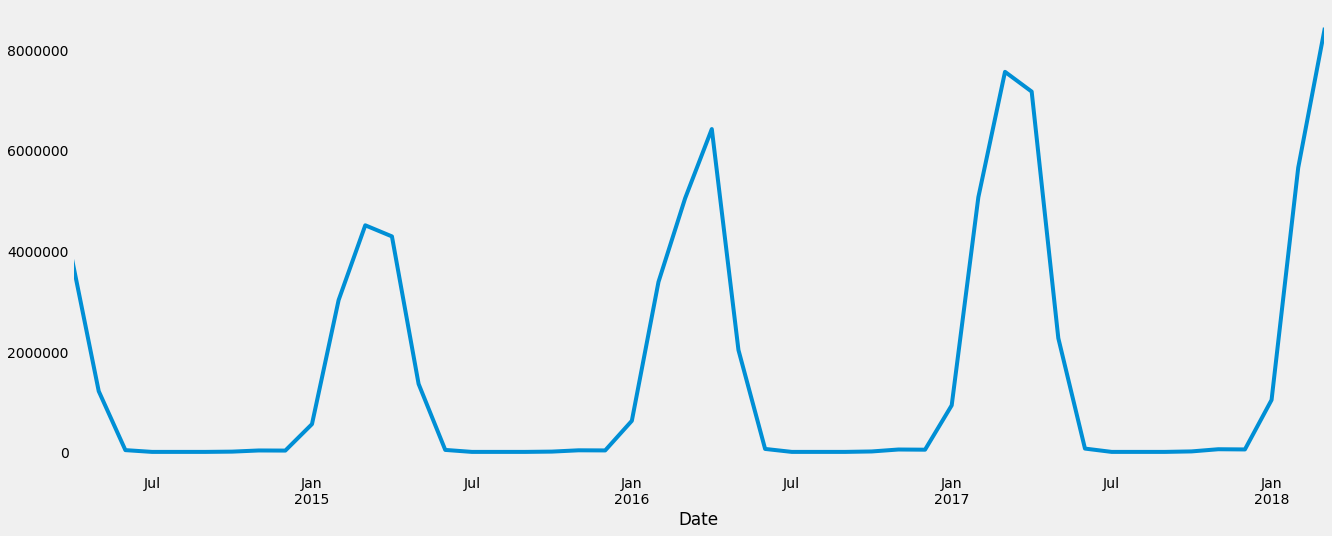

In [19]:
Coc_Coo['sales'].plot()
plt.grid();

In [20]:
Coc_Coo.sort_index(inplace= True)

In [21]:
Coc_Coo.head()

,product,city,sales
Date,,,
2014-04-01,coolers,Cochin,3829083
2014-05-01,coolers,Cochin,1207892
2014-06-01,coolers,Cochin,35105
2014-07-01,coolers,Cochin,0
2014-08-01,coolers,Cochin,0


In [22]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

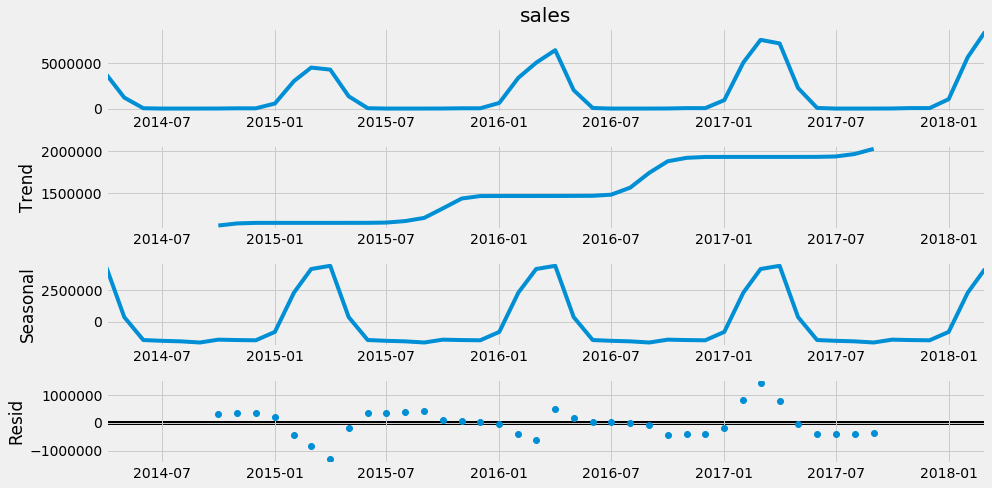

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(Coc_Coo['sales'],model='additive')
decomposition.plot();

In [24]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01             NaN
2014-05-01             NaN
2014-06-01             NaN
2014-07-01             NaN
2014-08-01             NaN
2014-09-01             NaN
2014-10-01    1.120069e+06
2014-11-01    1.145149e+06
2014-12-01    1.151338e+06
2015-01-01    1.151513e+06
2015-02-01    1.151513e+06
2015-03-01    1.151513e+06
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01    4.451956e+06
2014-05-01    3.723091e+05
2014-06-01   -1.453504e+06
2014-07-01   -1.515140e+06
2014-08-01   -1.558410e+06
2014-09-01   -1.649576e+06
2014-10-01   -1.423957e+06
2014-11-01   -1.455804e+06
2014-12-01   -1.473602e+06
2015-01-01   -8.080038e+05
2015-02-01    2.316024e+06
2015-03-01    4.197708e+06
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01    309085.454861
2014-11-01    338885.538194
2014-12-01    348

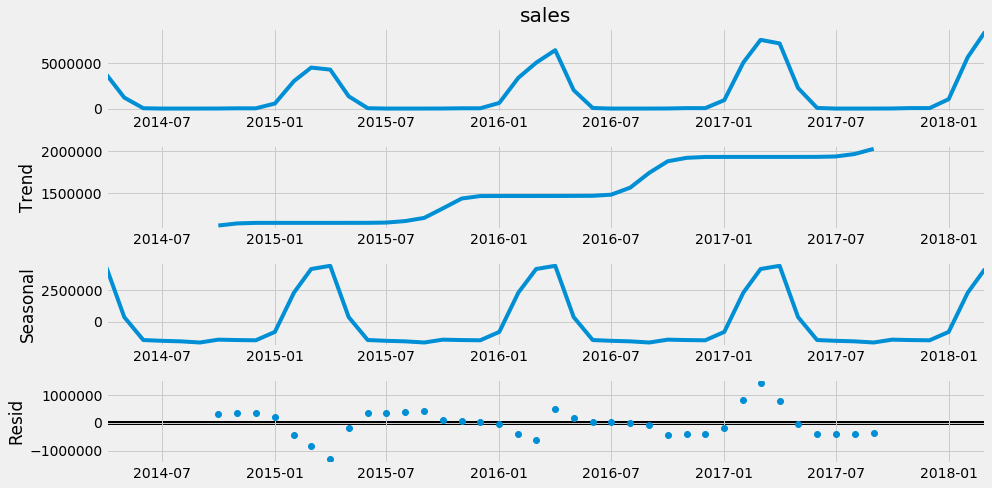

In [25]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 7
decomposition = seasonal_decompose(Coc_Coo['sales'],model='Multiplicative')
decomposition.plot();

In [26]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Date
2014-04-01             NaN
2014-05-01             NaN
2014-06-01             NaN
2014-07-01             NaN
2014-08-01             NaN
2014-09-01             NaN
2014-10-01    1.120069e+06
2014-11-01    1.145149e+06
2014-12-01    1.151338e+06
2015-01-01    1.151513e+06
2015-02-01    1.151513e+06
2015-03-01    1.151513e+06
Name: trend, dtype: float64 

Seasonality 
 Date
2014-04-01    4.451956e+06
2014-05-01    3.723091e+05
2014-06-01   -1.453504e+06
2014-07-01   -1.515140e+06
2014-08-01   -1.558410e+06
2014-09-01   -1.649576e+06
2014-10-01   -1.423957e+06
2014-11-01   -1.455804e+06
2014-12-01   -1.473602e+06
2015-01-01   -8.080038e+05
2015-02-01    2.316024e+06
2015-03-01    4.197708e+06
Name: seasonal, dtype: float64 

Residual 
 Date
2014-04-01              NaN
2014-05-01              NaN
2014-06-01              NaN
2014-07-01              NaN
2014-08-01              NaN
2014-09-01              NaN
2014-10-01    309085.454861
2014-11-01    338885.538194
2014-12-01    348

In [27]:
Coc_Coo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2014-04-01 to 2018-03-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   product  48 non-null     object
 1   city     48 non-null     object
 2   sales    48 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ KB


In [28]:
train    =   Coc_Coo[0:int(len(Coc_Coo)*0.7)] 
test     =  Coc_Coo[int(len(Coc_Coo)*0.7):]

In [29]:
train.shape

(33, 3)

In [30]:
test.shape

(15, 3)

In [31]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,product,city,sales
Date,,,
2014-04-01,coolers,Cochin,3829083
2014-05-01,coolers,Cochin,1207892
2014-06-01,coolers,Cochin,35105
2014-07-01,coolers,Cochin,0
2014-08-01,coolers,Cochin,0


Last few rows of Training Data


,product,city,sales
Date,,,
2016-08-01,coolers,Cochin,0
2016-09-01,coolers,Cochin,0
2016-10-01,coolers,Cochin,8718
2016-11-01,coolers,Cochin,47353
2016-12-01,coolers,Cochin,43714


First few rows of Test Data


,product,city,sales
Date,,,
2017-01-01,coolers,Cochin,926407
2017-02-01,coolers,Cochin,5066739
2017-03-01,coolers,Cochin,7560570
2017-04-01,coolers,Cochin,7167752
2017-05-01,coolers,Cochin,2261082


Last few rows of Test Data


,product,city,sales
Date,,,
2017-11-01,coolers,Cochin,52846
2017-12-01,coolers,Cochin,48785
2018-01-01,coolers,Cochin,1033876
2018-02-01,coolers,Cochin,5654514
2018-03-01,coolers,Cochin,8437645


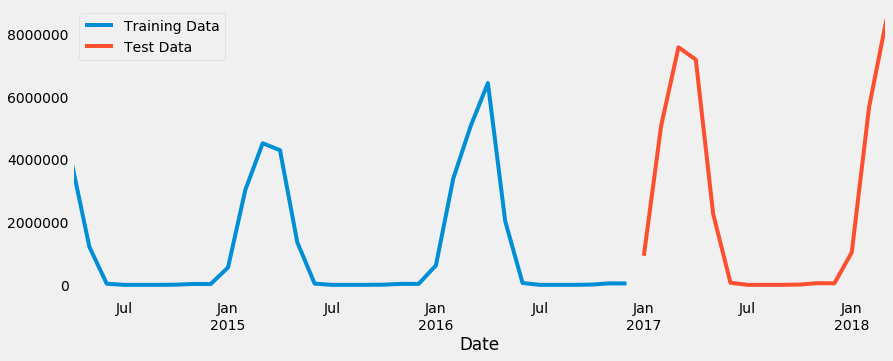

In [32]:
train['sales'].plot(figsize=(13,5), fontsize=14)
test['sales'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [33]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147]


In [34]:
from sklearn import metrics

Simpleaverage

In [35]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [36]:
SimpleAverage_test['mean_forecast'] = train['sales'].mean()
SimpleAverage_test.head()

,product,city,sales,mean_forecast
Date,,,,
2017-01-01,coolers,Cochin,926407,1.109404e+06
2017-02-01,coolers,Cochin,5066739,1.109404e+06
2017-03-01,coolers,Cochin,7560570,1.109404e+06
2017-04-01,coolers,Cochin,7167752,1.109404e+06
2017-05-01,coolers,Cochin,2261082,1.109404e+06


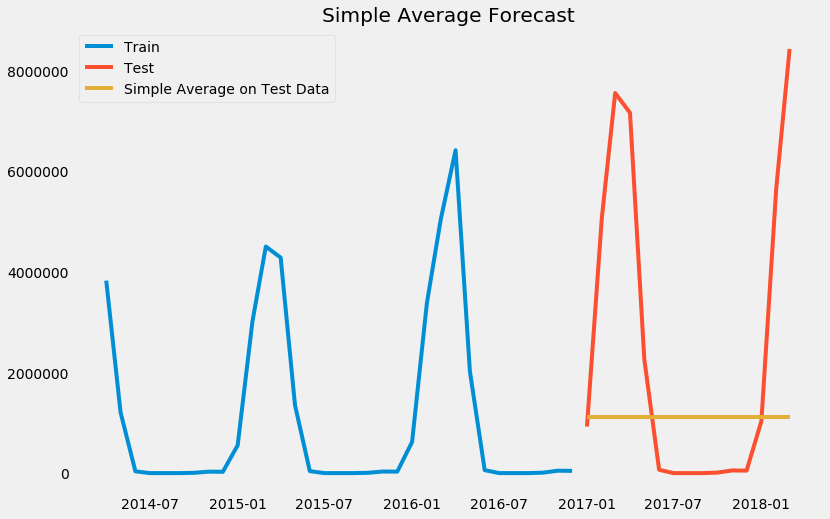

In [37]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['sales'], label='Train')
plt.plot(SimpleAverage_test['sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [38]:
## Test Data - RMSE 

rmse_model3_test = metrics.mean_squared_error(test['sales'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 3444226.635


In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

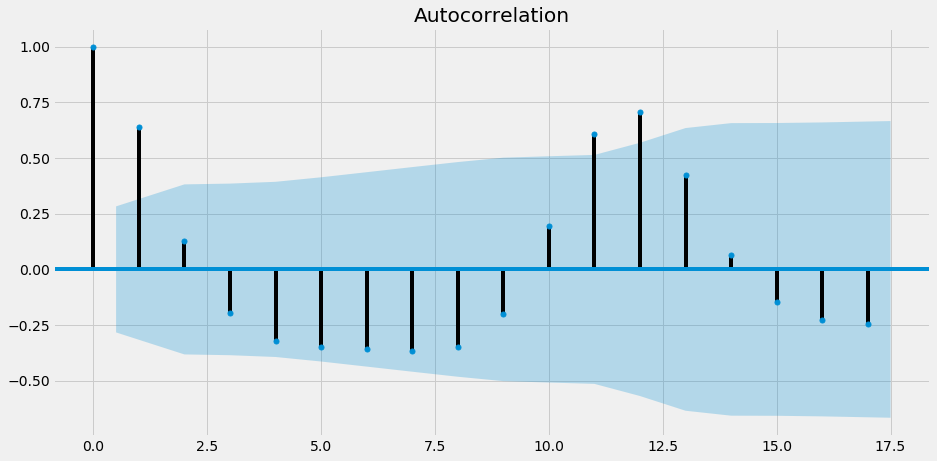

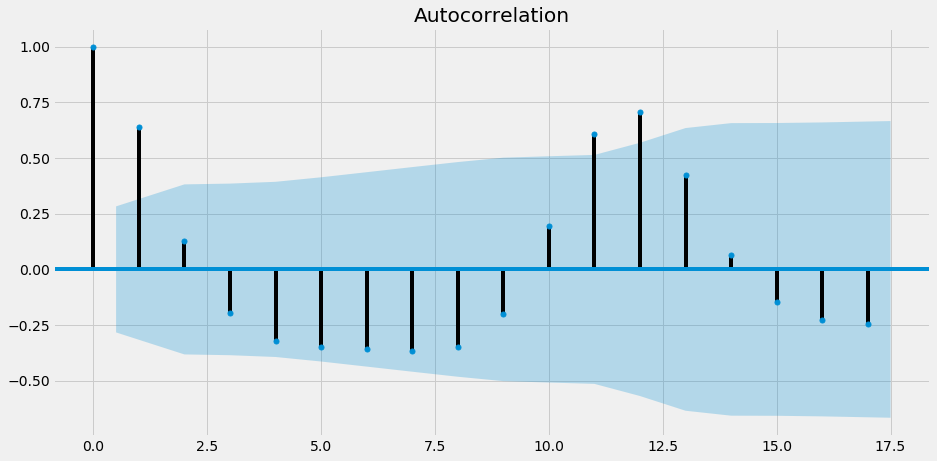

In [42]:
plot_acf(Coc_Coo['sales'])

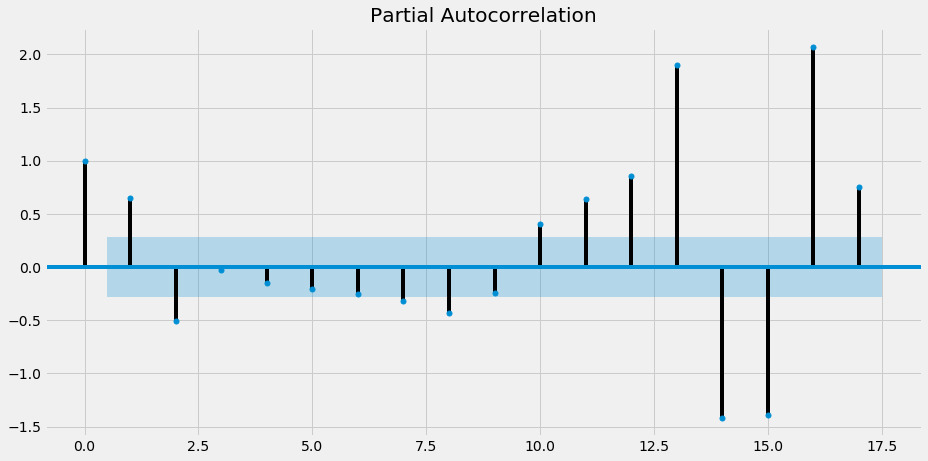

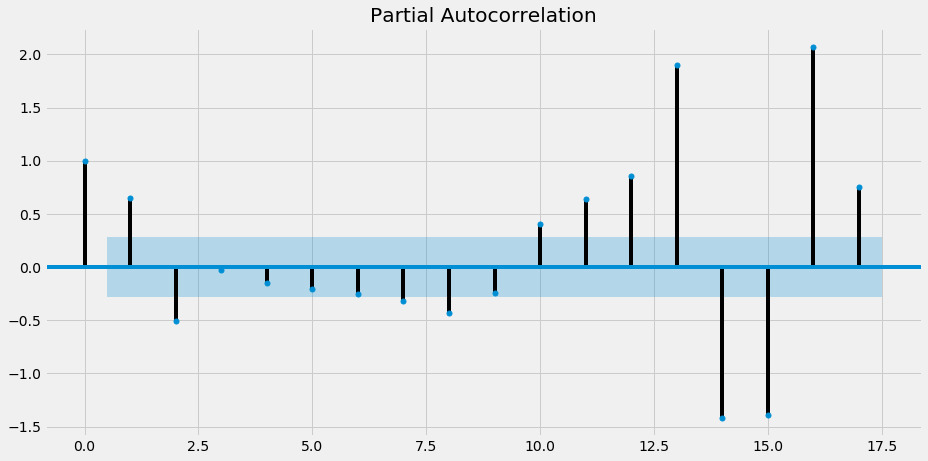

In [43]:
plot_pacf(Coc_Coo['sales'])

In [40]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average'])
resultsDf

,Test RMSE
Simple Average,3.444227e+06


In [58]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

Simple average

In [59]:
SES_train = train.copy()
SES_test = test.copy()

In [60]:
model_SES = SimpleExpSmoothing(SES_train['sales'])

In [61]:
model_SES_autofit = model_SES.fit(optimized=True)

In [62]:
model_SES_autofit.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 3829083.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [63]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(test))
SES_test.head()

,product,city,sales,predict
Date,,,,
2017-01-01,coolers,Cochin,926407,43731.228035
2017-02-01,coolers,Cochin,5066739,43731.228035
2017-03-01,coolers,Cochin,7560570,43731.228035
2017-04-01,coolers,Cochin,7167752,43731.228035
2017-05-01,coolers,Cochin,2261082,43731.228035


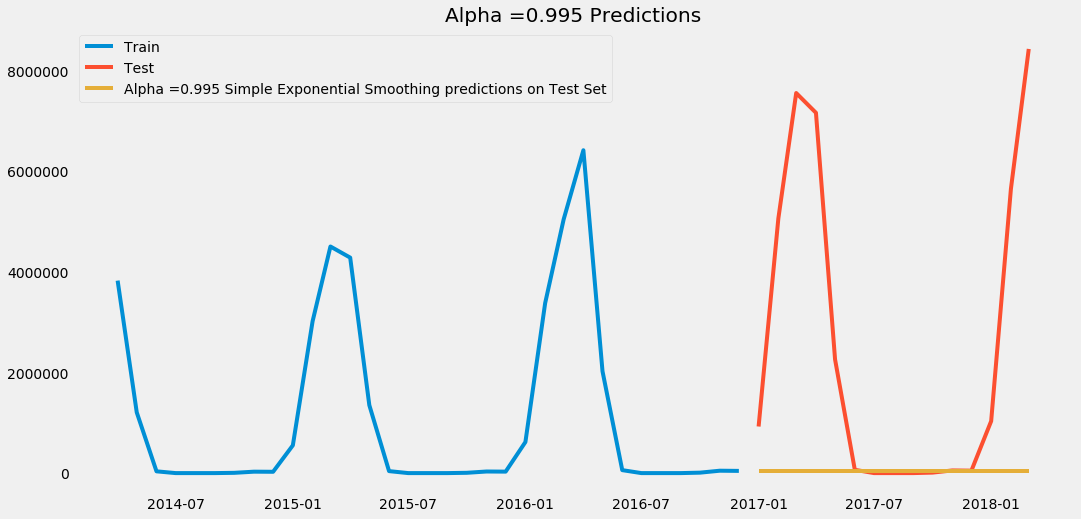

In [64]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =0.995 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.995 Predictions');

In [65]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['sales'],SES_test['predict'],squared=False)
print("For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is %3.3f" %(rmse_model5_test_1))


For Alpha =0.995 Simple Exponential Smoothing Model forecast on the Test Data, RMSE is 4009218.118


In [66]:
def mean_absolute_percentage_error(y_true, y_pred): 

    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [67]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict'])
print('\nMAPE:',mape)


MAPE: inf


In [68]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_model5_test_1], 'Test MAPE': [mape] },index=['Alpha=0.995,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,Test RMSE,Test MAPE
Simple Average,3.444227e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",4.009218e+06,inf


In [69]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_6

,Alpha Values,Train RMSE,Test RMSE


In [70]:
for i in np.arange(0.1,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False,use_brute=True)
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=18)
    
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['sales'],SES_train['predict',i],squared=False)
    
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['sales'],SES_test['predict',i],squared=False)
    
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Test RMSE':rmse_model5_test_i}, ignore_index=True)

In [71]:
resultsDf_6.sort_values(by=['Test RMSE'],ascending=True)

,Alpha Values,Train RMSE,Test RMSE
0,0.1,2.163948e+06,3.486141e+06
1,0.2,2.021037e+06,3.702112e+06
2,0.3,1.922027e+06,3.863483e+06
3,0.4,1.825875e+06,3.957858e+06
4,0.5,1.733888e+06,3.997536e+06
5,0.6,1.648744e+06,4.008978e+06
8,0.9,1.437961e+06,4.009248e+06
7,0.8,1.500946e+06,4.009760e+06
6,0.7,1.571158e+06,4.010419e+06


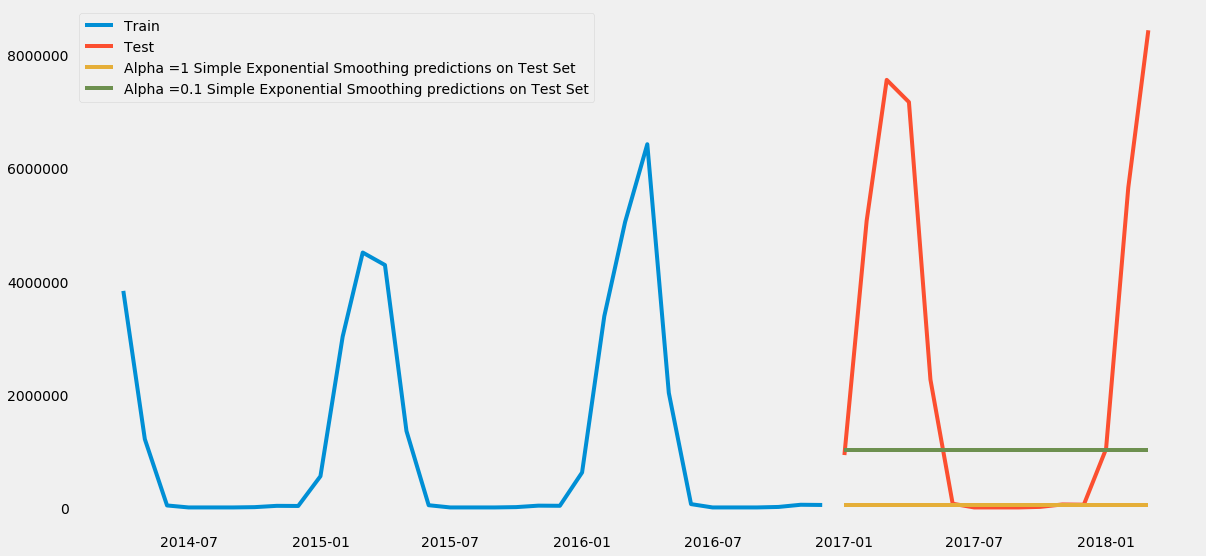

In [72]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['sales'], label='Train')
plt.plot(SES_test['sales'], label='Test')

plt.plot(SES_test['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Test Set')

plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [73]:
mape = mean_absolute_percentage_error(SES_test['sales'],SES_test['predict',0.1])
print('\nMAPE:',mape)


MAPE: inf


In [74]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE': [resultsDf_6.sort_values(by=['Test RMSE'],ascending=True).values[0][2]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,3.444227e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",4.009218e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",3.486141e+06,inf


Double

In [75]:
DES_train = train.copy()
DES_test = test.copy()

In [76]:
model_DES = Holt(DES_train['sales'])

In [77]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE


In [78]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i, smoothing_trend = j, optimized=False,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=18)
        
        rmse_model6_train = metrics.mean_squared_error(DES_train['sales'],DES_train['predict',i,j],squared=False)
        
        rmse_model6_test = metrics.mean_squared_error(DES_test['sales'],DES_test['predict',i,j],squared=False)
        
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                          ,'Test RMSE':rmse_model6_test}, ignore_index=True)

In [79]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Test RMSE
0,0.1,0.1,1.032993e+07,3.571577e+06
1,0.1,0.2,7.462772e+06,5.043586e+06
2,0.1,0.3,6.290062e+06,4.260311e+06
3,0.1,0.4,5.473128e+06,8.581967e+06
4,0.1,0.5,4.926451e+06,9.530545e+06
...,...,...,...,...
95,1.0,0.6,1.561641e+06,4.012121e+06
96,1.0,0.7,1.567867e+06,3.988034e+06
97,1.0,0.8,1.577288e+06,3.992996e+06
98,1.0,0.9,1.591707e+06,4.007893e+06


In [80]:
resultsDf_7.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Train RMSE,Test RMSE
56,0.6,0.7,1.974478e+06,3.387137e+06
57,0.6,0.8,1.987727e+06,3.397789e+06
55,0.6,0.6,1.966521e+06,3.430870e+06
49,0.5,1.0,2.172151e+06,3.432283e+06
45,0.5,0.6,2.127683e+06,3.451766e+06


In [82]:
mape = mean_absolute_percentage_error(DES_test['sales'],DES_test['predict',0.6,0.8])
print('\nMAPE:',mape)


MAPE: inf


In [83]:
resultsDf_7_1 = pd.DataFrame({'Test RMSE': [resultsDf_7.sort_values(by=['Test RMSE']).values[0][3]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.6,Beta=0.7,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,3.444227e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",4.009218e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",3.486141e+06,inf
"Alpha=0.6,Beta=0.7,DoubleExponentialSmoothing",3.387137e+06,inf


In [84]:
TES_train = train.copy()
TES_test = test.copy()

In [87]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train['sales'],trend='additive',seasonal='additive',initialization_method='estimated')

In [88]:
model_TES_autofit = model_TES.fit()

In [89]:
model_TES_autofit.params

{'smoothing_level': 0.5353571428571429,
 'smoothing_trend': 0.00010000000000000002,
 'smoothing_seasonal': 0.0001,
 'damping_trend': nan,
 'initial_level': 1136024.8194444436,
 'initial_trend': 2198.6373737374524,
 'initial_seasons': array([ 3138935.78819444,   204345.37152778, -1108859.96180556,
        -1151039.79513889, -1168830.42013889, -1206314.46180556,
        -1111055.50347222, -1113102.46180556, -1121461.54513889,
         -595390.33680556,  1872998.66319444,  3359774.66319444]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [90]:
## Prediction on the test data

TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(test))
TES_test.head()

,product,city,sales,auto_predict
Date,,,,
2017-01-01,coolers,Cochin,926407,5.741024e+05
2017-02-01,coolers,Cochin,5066739,3.044712e+06
2017-03-01,coolers,Cochin,7560570,4.533683e+06
2017-04-01,coolers,Cochin,7167752,4.315135e+06
2017-05-01,coolers,Cochin,2261082,1.382555e+06


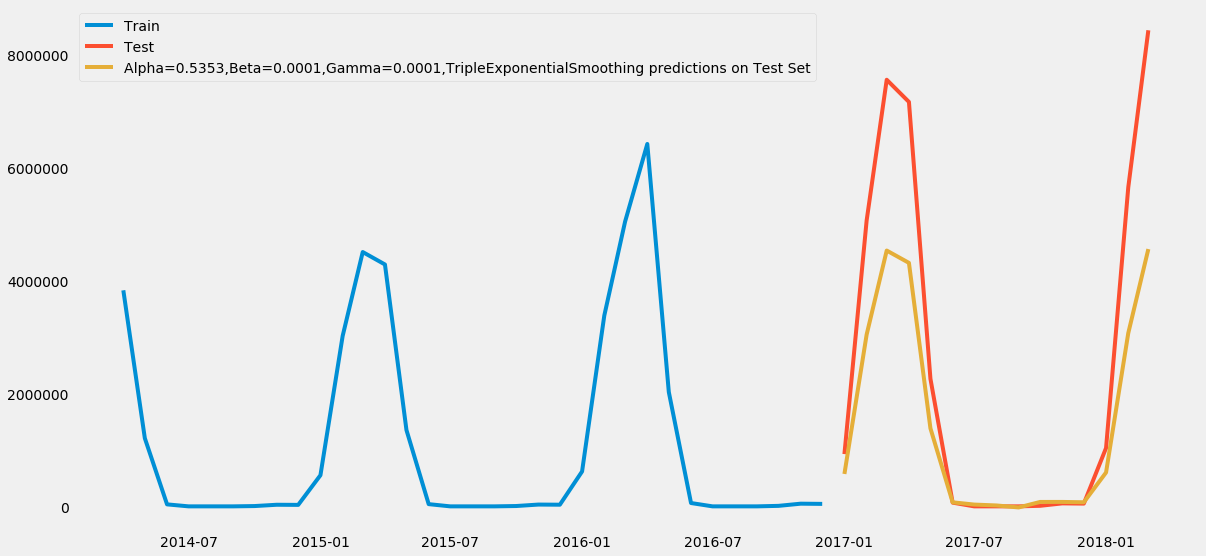

In [92]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['sales'], label='Train')
plt.plot(TES_test['sales'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.5353,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [93]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['sales'],TES_test['auto_predict'],squared=False)
print("Forlabel='Alpha=0.5353,Beta=0.0001,Gamma=0.0001', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is %3.3f" %(rmse_model6_test_1))

Forlabel='Alpha=0.5353,Beta=0.0001,Gamma=0.0001', Triple Exponential Smoothing Model forecast on the Test Data,  RMSE is 1716385.933


In [94]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['auto_predict'])
print('\nMAPE:',mape)


MAPE: inf


In [95]:
resultsDf_8_1 = pd.DataFrame({'Test RMSE': [rmse_model6_test_1], 'Test MAPE' : [mape]}
                           ,index=['Alpha=0.5353,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,Test RMSE,Test MAPE
Simple Average,3.444227e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",4.009218e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",3.486141e+06,inf
"Alpha=0.6,Beta=0.7,DoubleExponentialSmoothing",3.387137e+06,inf
"Alpha=0.5353,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.716386e+06,inf


In [96]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Test RMSE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE


In [97]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=18)
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['sales'],TES_train['predict',i,j,k],squared=False)
            
            rmse_model8_test = metrics.mean_squared_error(TES_test['sales'],TES_test['predict',i,j,k],squared=False)
            
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,
                                                  'Train RMSE':rmse_model8_train,'Test RMSE':rmse_model8_test}
                                                 , ignore_index=True)

In [98]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
0,0.1,0.1,0.1,4.225313e+05,1.494860e+06
1,0.1,0.1,0.2,4.281170e+05,1.453553e+06
2,0.1,0.1,0.3,4.322038e+05,1.411710e+06
3,0.1,0.1,0.4,4.347799e+05,1.369988e+06
4,0.1,0.1,0.5,4.358432e+05,1.329003e+06
...,...,...,...,...,...
995,1.0,1.0,0.6,8.693822e+05,2.576683e+06
996,1.0,1.0,0.7,9.848504e+05,3.204857e+06
997,1.0,1.0,0.8,1.146390e+06,4.014955e+06
998,1.0,1.0,0.9,1.355863e+06,5.009798e+06


In [99]:
resultsDf_8_2.sort_values(by=['Test RMSE']).head()

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Test RMSE
19,0.1,0.2,1.0,432104.929455,1.136202e+06
9,0.1,0.1,1.0,419075.613100,1.151437e+06
18,0.1,0.2,0.9,438666.291266,1.170458e+06
29,0.1,0.3,1.0,446862.746778,1.171669e+06
8,0.1,0.1,0.9,425262.996653,1.182289e+06


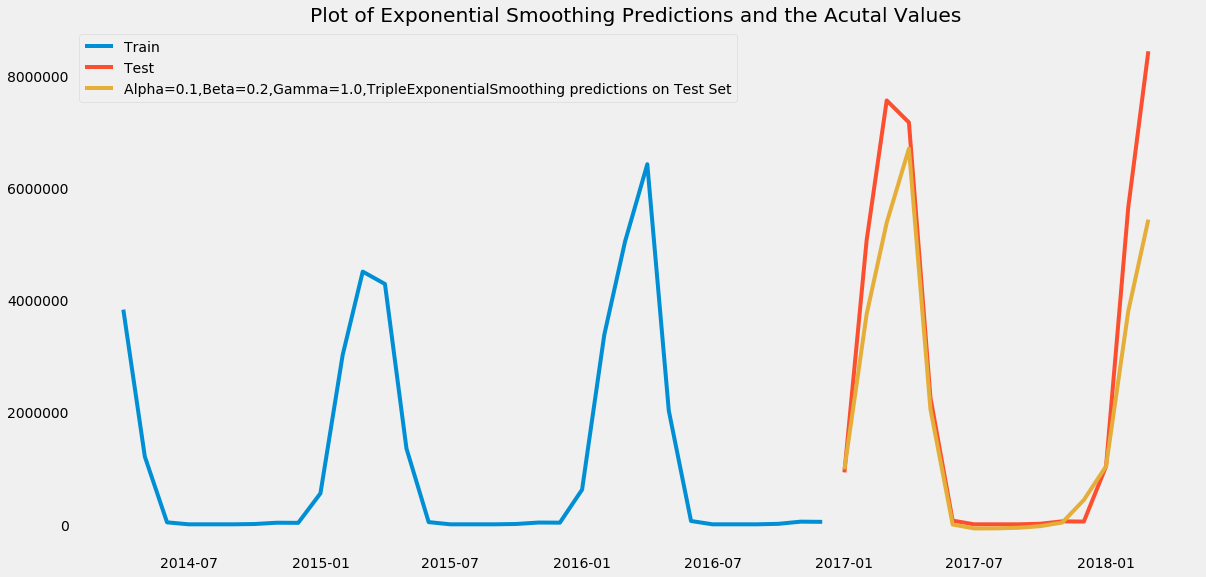

In [100]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(train['sales'], label='Train')
plt.plot(test['sales'], label='Test')


plt.plot(TES_test['predict', 0.1000000000000000, 0.2000000000000000, 1.0], label='Alpha=0.1,Beta=0.2,Gamma=1.0,TripleExponentialSmoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Acutal Values');

In [101]:
mape = mean_absolute_percentage_error(TES_test['sales'],TES_test['predict',0.1,0.2,1.0])
print('\nMAPE:',mape)


MAPE: inf


In [102]:
resultsDf_8_3 = pd.DataFrame({'Test RMSE': [resultsDf_8_2.sort_values(by=['Test RMSE']).values[0][4]],'Test MAPE':[mape]}
                           ,index=['Alpha=0.1,Beta=0.2,Gamma=1.0,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,Test RMSE,Test MAPE
Simple Average,3.444227e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",4.009218e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",3.486141e+06,inf
"Alpha=0.6,Beta=0.7,DoubleExponentialSmoothing",3.387137e+06,inf
"Alpha=0.5353,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.716386e+06,inf
"Alpha=0.1,Beta=0.2,Gamma=1.0,TripleExponentialSmoothing",1.136202e+06,inf


In [103]:
print('Sorted by RMSE values on the Test Data:','\n',)
resultsDf.sort_values(by=['Test RMSE'])

Sorted by RMSE values on the Test Data: 



,Test RMSE,Test MAPE
"Alpha=0.1,Beta=0.2,Gamma=1.0,TripleExponentialSmoothing",1.136202e+06,inf
"Alpha=0.5353,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.716386e+06,inf
"Alpha=0.6,Beta=0.7,DoubleExponentialSmoothing",3.387137e+06,inf
Simple Average,3.444227e+06,NaN
"Alpha=0.1,SimpleExponentialSmoothing",3.486141e+06,inf
"Alpha=0.995,SimpleExponentialSmoothing",4.009218e+06,inf


In [104]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

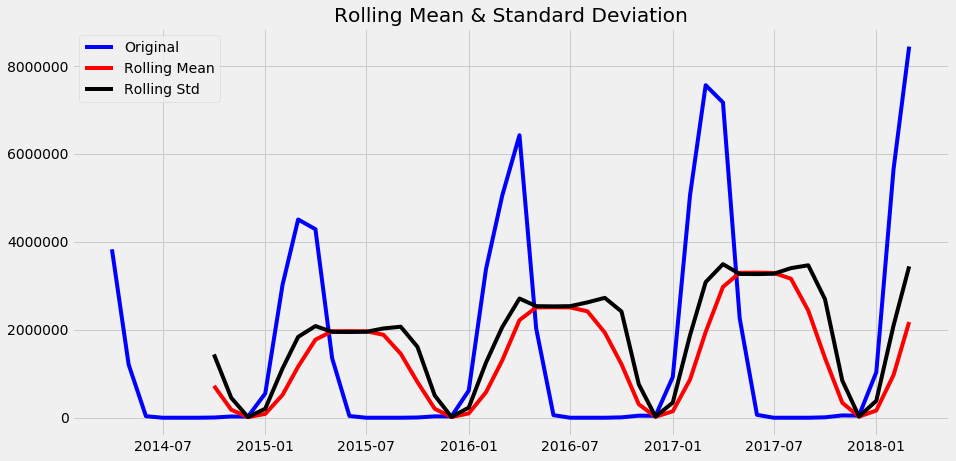

Results of Dickey-Fuller Test:
Test Statistic                 -0.798327
p-value                         0.819613
#Lags Used                     10.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64 



In [106]:
test_stationarity(Coc_Coo['sales'])

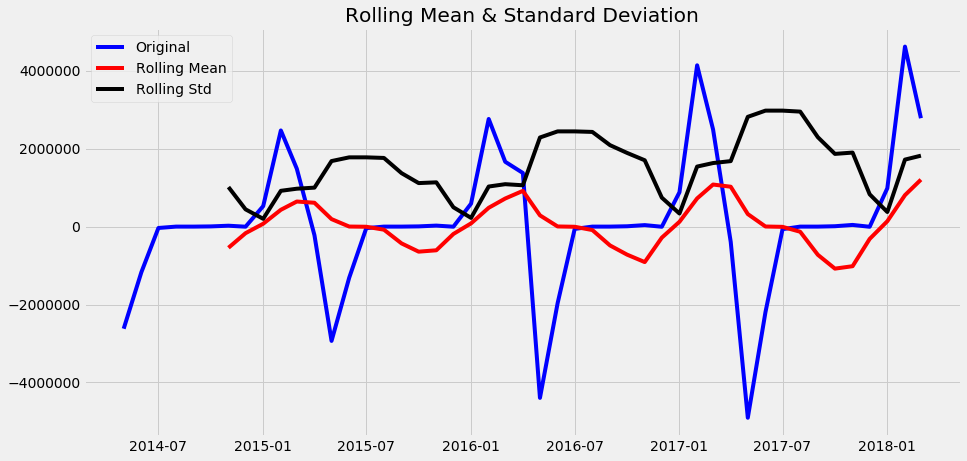

Results of Dickey-Fuller Test:
Test Statistic                -1.200876e+01
p-value                        3.217499e-22
#Lags Used                     1.000000e+01
Number of Observations Used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
Critical Value (10%)          -2.611671e+00
dtype: float64 



In [108]:
test_stationarity(Coc_Coo['sales'].diff().dropna())

In [316]:
train =train[~train.isin([np.nan, np.inf, -np.inf]).any(1)]

In [317]:
test.dropna(inplace=True)

In [318]:
test = test.replace(np.inf, np.nan).replace(-np.inf, np.nan).dropna()

In [91]:
from statsmodels.tsa.stattools import adfuller

In [94]:
dftest = adfuller(Che_Coo['sales'],regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -5.697
DF test p-value is 9.27671722133612e-06
Number of lags used 9


In [95]:
dftest = adfuller(train['sales'],regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -4.896
DF test p-value is 0.0003172426490993805
Number of lags used 10


In [109]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [110]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [111]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['sales'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:998.7311362485883
ARIMA(0, 1, 1) - AIC:999.0114355358409
ARIMA(0, 1, 2) - AIC:1000.3378638373603
ARIMA(0, 1, 3) - AIC:994.5738713022777
ARIMA(1, 1, 0) - AIC:1000.3042173562376
ARIMA(1, 1, 1) - AIC:1000.9330441700478
ARIMA(1, 1, 2) - AIC:996.8488522741216
ARIMA(1, 1, 3) - AIC:995.8822458832465
ARIMA(2, 1, 0) - AIC:999.6235039004489
ARIMA(2, 1, 1) - AIC:993.8282319252924
ARIMA(2, 1, 2) - AIC:996.4883505316125
ARIMA(2, 1, 3) - AIC:997.7236654742013
ARIMA(3, 1, 0) - AIC:999.3817981595384
ARIMA(3, 1, 1) - AIC:995.7669178442981
ARIMA(3, 1, 2) - AIC:997.5047884030396
ARIMA(3, 1, 3) - AIC:1000.9371545345614


In [112]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

,param,AIC
9,"(2, 1, 1)",993.828232
3,"(0, 1, 3)",994.573871
13,"(3, 1, 1)",995.766918
7,"(1, 1, 3)",995.882246
10,"(2, 1, 2)",996.488351


In [113]:
auto_ARIMA = ARIMA(train['sales'], order=(2,1,1))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                   33
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -492.914
Date:                Fri, 20 Aug 2021   AIC                            993.828
Time:                        09:21:46   BIC                            999.691
Sample:                    04-01-2014   HQIC                           995.772
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9414      0.134      7.046      0.000       0.680       1.203
ar.L2         -0.3898      0.180     -2.165      0.030      -0.743      -0.037
ma.L1         -0.9936      0.243     -4.082      0.0

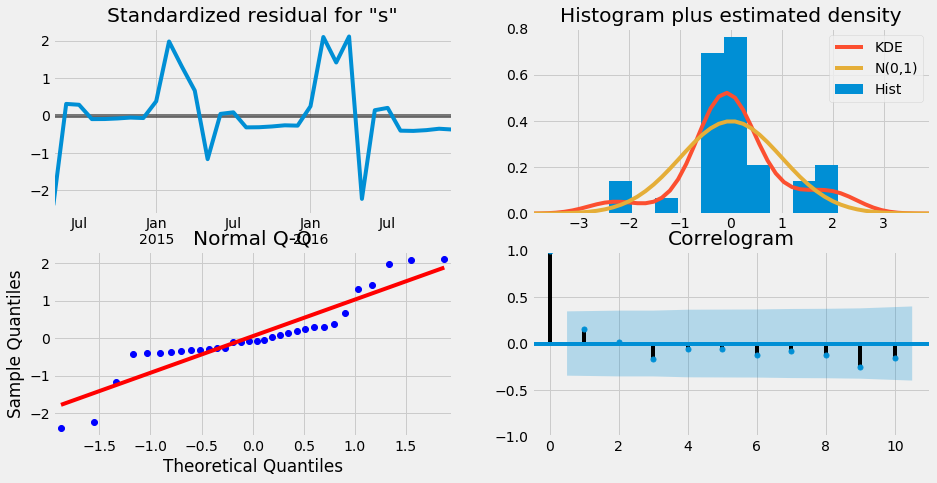

In [114]:
results_auto_ARIMA.plot_diagnostics();

In [115]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [116]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [117]:
rmse = mean_squared_error(test['sales'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 3493796.5579505116 
MAPE: inf


In [118]:
resultsDf_8_4 = pd.DataFrame({'Test RMSE': [resultsDf_8_3.sort_values(by=['Test RMSE']).values[0][1]],'Test MAPE':[mape]}
                           ,index=['ARIMA(2,1,1)'])

resultsDf = pd.concat([resultsDf, resultsDf_8_4])
resultsDf

,Test RMSE,Test MAPE
Simple Average,3.444227e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",4.009218e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",3.486141e+06,inf
"Alpha=0.6,Beta=0.7,DoubleExponentialSmoothing",3.387137e+06,inf
"Alpha=0.5353,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.716386e+06,inf
"Alpha=0.1,Beta=0.2,Gamma=1.0,TripleExponentialSmoothing",1.136202e+06,inf
"ARIMA(2,1,1)",inf,inf


In [119]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 1, 1, 6)
Model: (0, 1, 2)(0, 1, 2, 6)
Model: (0, 1, 3)(0, 1, 3, 6)
Model: (1, 1, 0)(1, 1, 0, 6)
Model: (1, 1, 1)(1, 1, 1, 6)
Model: (1, 1, 2)(1, 1, 2, 6)
Model: (1, 1, 3)(1, 1, 3, 6)
Model: (2, 1, 0)(2, 1, 0, 6)
Model: (2, 1, 1)(2, 1, 1, 6)
Model: (2, 1, 2)(2, 1, 2, 6)
Model: (2, 1, 3)(2, 1, 3, 6)
Model: (3, 1, 0)(3, 1, 0, 6)
Model: (3, 1, 1)(3, 1, 1, 6)
Model: (3, 1, 2)(3, 1, 2, 6)
Model: (3, 1, 3)(3, 1, 3, 6)


In [120]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [121]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}6 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

SARIMA(0, 1, 0)x(0, 1, 0, 6)6 - AIC:801.8431142124861
SARIMA(0, 1, 0)x(0, 1, 1, 6)6 - AIC:603.3312271955041
SARIMA(0, 1, 0)x(0, 1, 2, 6)6 - AIC:411.28286940850666
SARIMA(0, 1, 0)x(0, 1, 3, 6)6 - AIC:224.44049124187325
SARIMA(0, 1, 0)x(1, 1, 0, 6)6 - AIC:584.7536606493062
SARIMA(0, 1, 0)x(1, 1, 1, 6)6 - AIC:568.6650053388819
SARIMA(0, 1, 0)x(1, 1, 2, 6)6 - AIC:410.16757622056264
SARIMA(0, 1, 0)x(1, 1, 3, 6)6 - AIC:226.13068112983626
SARIMA(0, 1, 0)x(2, 1, 0, 6)6 - AIC:416.1295160123394
SARIMA(0, 1, 0)x(2, 1, 1, 6)6 - AIC:407.9730968316577
SARIMA(0, 1, 0)x(2, 1, 2, 6)6 - AIC:411.9055933188247
SARIMA(0, 1, 0)x(2, 1, 3, 6)6 - AIC:228.13066999231623
SARIMA(0, 1, 0)x(3, 1, 0, 6)6 - AIC:46.34622614300832
SARIMA(0, 1, 0)x(3, 1, 1, 6)6 - AIC:48.412725762625826
SARIMA(0, 1, 0)x(3, 1, 2, 6)6 - AIC:259.28721074824887
SARIMA(0, 1, 0)x(3, 1, 3, 6)6 - AIC:230.1306742283912
SARIMA(0, 1, 1)x(0, 1, 0, 6)6 - AIC:767.3451640986552
SARIMA(0, 1, 1)x(0, 1, 1, 6)6 - AIC:568.5121892248665
SARIMA(0, 1, 1)x(0, 1

SARIMA(2, 1, 1)x(1, 1, 3, 6)6 - AIC:200.88769379599876
SARIMA(2, 1, 1)x(2, 1, 0, 6)6 - AIC:382.3306104807561
SARIMA(2, 1, 1)x(2, 1, 1, 6)6 - AIC:383.85538871184457
SARIMA(2, 1, 1)x(2, 1, 2, 6)6 - AIC:385.806931880219
SARIMA(2, 1, 1)x(2, 1, 3, 6)6 - AIC:202.88769538102076
SARIMA(2, 1, 1)x(3, 1, 0, 6)6 - AIC:198.88766889975474
SARIMA(2, 1, 1)x(3, 1, 1, 6)6 - AIC:200.88766897989098
SARIMA(2, 1, 1)x(3, 1, 2, 6)6 - AIC:202.8877342793546
SARIMA(2, 1, 1)x(3, 1, 3, 6)6 - AIC:204.88775465440756
SARIMA(2, 1, 2)x(0, 1, 0, 6)6 - AIC:731.3036397183371
SARIMA(2, 1, 2)x(0, 1, 1, 6)6 - AIC:542.7909771270075
SARIMA(2, 1, 2)x(0, 1, 2, 6)6 - AIC:354.76360908201667
SARIMA(2, 1, 2)x(0, 1, 3, 6)6 - AIC:170.58089734985265
SARIMA(2, 1, 2)x(1, 1, 0, 6)6 - AIC:569.0120840927893
SARIMA(2, 1, 2)x(1, 1, 1, 6)6 - AIC:540.0917167649588
SARIMA(2, 1, 2)x(1, 1, 2, 6)6 - AIC:356.226331520046
SARIMA(2, 1, 2)x(1, 1, 3, 6)6 - AIC:172.5808605589944
SARIMA(2, 1, 2)x(2, 1, 0, 6)6 - AIC:385.477728847611
SARIMA(2, 1, 2)x(2, 1, 

In [122]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
12,"(0, 1, 0)","(3, 1, 0, 6)",46.346226
13,"(0, 1, 0)","(3, 1, 1, 6)",48.412726
51,"(0, 1, 3)","(0, 1, 3, 6)",138.969593
115,"(1, 1, 3)","(0, 1, 3, 6)",140.319306
55,"(0, 1, 3)","(1, 1, 3, 6)",140.969597


In [124]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['sales'],
                                order=(0,1,0),
                                seasonal_order=(3,1,0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                     
Dep. Variable:                             sales   No. Observations:                   33
Model:             SARIMAX(0, 1, 0)x(3, 1, 0, 6)   Log Likelihood                 -19.173
Date:                           Fri, 20 Aug 2021   AIC                             46.346
Time:                                   09:25:50   BIC                             46.664
Sample:                               04-01-2014   HQIC                            44.203
                                    - 12-01-2016                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L6       -1.0000   2.08e-05  -4.81e+04      0.000      -1.000      -1.000
ar.S.L12       4.6681      0.000   4.08e+04

In [125]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [126]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2017-01-01,9.264054e+05,2.658337,9.264002e+05,9.264106e+05
2017-02-01,5.066737e+06,3.759456,5.066729e+06,5.066744e+06
2017-03-01,7.560562e+06,4.604374,7.560553e+06,7.560571e+06
2017-04-01,1.639388e+07,5.316673,1.639387e+07,1.639389e+07
2017-05-01,5.171479e+06,5.944222,5.171467e+06,5.171490e+06


In [127]:
rmse = mean_squared_error(test['sales'],predicted_auto_SARIMA.predicted_mean,squared=True)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 17753745981308.57 
MAPE: inf


In [128]:
resultsDf_8_5 = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape]}
                           ,index=['SARIMA(0,1,0)(3,1,0)6'])

resultsDf = pd.concat([resultsDf, resultsDf_8_5])
resultsDf

,Test RMSE,Test MAPE
Simple Average,3.444227e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",4.009218e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",3.486141e+06,inf
"Alpha=0.6,Beta=0.7,DoubleExponentialSmoothing",3.387137e+06,inf
"Alpha=0.5353,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.716386e+06,inf
"Alpha=0.1,Beta=0.2,Gamma=1.0,TripleExponentialSmoothing",1.136202e+06,inf
"ARIMA(2,1,1)",inf,inf
"SARIMA(0,1,0)(3,1,0)6",1.775375e+13,inf


In [129]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE,Test MAPE
"Alpha=0.1,Beta=0.2,Gamma=1.0,TripleExponentialSmoothing",1.136202e+06,inf
"Alpha=0.5353,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.716386e+06,inf
"Alpha=0.6,Beta=0.7,DoubleExponentialSmoothing",3.387137e+06,inf
Simple Average,3.444227e+06,NaN
"Alpha=0.1,SimpleExponentialSmoothing",3.486141e+06,inf
"Alpha=0.995,SimpleExponentialSmoothing",4.009218e+06,inf
"SARIMA(0,1,0)(3,1,0)6",1.775375e+13,inf
"ARIMA(2,1,1)",inf,inf


In [130]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(1,2)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [131]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [132]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)
        

SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:559.7663910704922
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:202.36983592493485
SARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:6.0
SARIMA(0, 1, 0)x(0, 1, 3, 12)12 - AIC:8.0
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:42.369348693047726
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:202.70887008425433
SARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:8.0
SARIMA(0, 1, 0)x(1, 1, 3, 12)12 - AIC:10.0
SARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:6.0
SARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:8.0
SARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:10.0
SARIMA(0, 1, 0)x(2, 1, 3, 12)12 - AIC:12.0
SARIMA(0, 1, 0)x(3, 1, 0, 12)12 - AIC:8.0
SARIMA(0, 1, 0)x(3, 1, 1, 12)12 - AIC:10.0
SARIMA(0, 1, 0)x(3, 1, 2, 12)12 - AIC:12.0
SARIMA(0, 1, 0)x(3, 1, 3, 12)12 - AIC:14.0
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:529.2007558826846
SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:175.71654466906625
SARIMA(0, 1, 1)x(0, 1, 2, 12)12 - AIC:8.0
SARIMA(0, 1, 1)x(0, 1, 3, 12)12 - AIC:10.0
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:232.28801496245538
SARIMA(0

SARIMA(2, 1, 3)x(0, 1, 1, 12)12 - AIC:123.32896831043855
SARIMA(2, 1, 3)x(0, 1, 2, 12)12 - AIC:16.0
SARIMA(2, 1, 3)x(0, 1, 3, 12)12 - AIC:18.0
SARIMA(2, 1, 3)x(1, 1, 0, 12)12 - AIC:177.52180382800262
SARIMA(2, 1, 3)x(1, 1, 1, 12)12 - AIC:126.83850544905582
SARIMA(2, 1, 3)x(1, 1, 2, 12)12 - AIC:18.0
SARIMA(2, 1, 3)x(1, 1, 3, 12)12 - AIC:20.0
SARIMA(2, 1, 3)x(2, 1, 0, 12)12 - AIC:16.0
SARIMA(2, 1, 3)x(2, 1, 1, 12)12 - AIC:18.0
SARIMA(2, 1, 3)x(2, 1, 2, 12)12 - AIC:20.0
SARIMA(2, 1, 3)x(2, 1, 3, 12)12 - AIC:22.0
SARIMA(2, 1, 3)x(3, 1, 0, 12)12 - AIC:18.0
SARIMA(2, 1, 3)x(3, 1, 1, 12)12 - AIC:20.0
SARIMA(2, 1, 3)x(3, 1, 2, 12)12 - AIC:22.0
SARIMA(2, 1, 3)x(3, 1, 3, 12)12 - AIC:24.0
SARIMA(3, 1, 0)x(0, 1, 0, 12)12 - AIC:504.1441778487242
SARIMA(3, 1, 0)x(0, 1, 1, 12)12 - AIC:207.29670739907223
SARIMA(3, 1, 0)x(0, 1, 2, 12)12 - AIC:12.0
SARIMA(3, 1, 0)x(0, 1, 3, 12)12 - AIC:14.0
SARIMA(3, 1, 0)x(1, 1, 0, 12)12 - AIC:150.92475819096126
SARIMA(3, 1, 0)x(1, 1, 1, 12)12 - AIC:152.92546172670126


In [133]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
2,"(0, 1, 0)","(0, 1, 2, 12)",6.0
8,"(0, 1, 0)","(2, 1, 0, 12)",6.0
9,"(0, 1, 0)","(2, 1, 1, 12)",8.0
66,"(1, 1, 0)","(0, 1, 2, 12)",8.0
24,"(0, 1, 1)","(2, 1, 0, 12)",8.0


In [134]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['sales'],
                                order=(0, 1, 0),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                   sales   No. Observations:                   33
Model:             SARIMAX(0, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                   0.000
Date:                                 Fri, 20 Aug 2021   AIC                              6.000
Time:                                         09:28:24   BIC                                nan
Sample:                                     04-01-2014   HQIC                               nan
                                          - 12-01-2016                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12            0         -0        nan        nan           0        

In [135]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [136]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

sales,mean,mean_se,mean_ci_lower,mean_ci_upper
2017-01-01,632846.0,4.930767e+05,-3.335666e+05,1.599259e+06
2017-02-01,3396208.0,6.973158e+05,2.029494e+06,4.762922e+06
2017-03-01,5060653.0,8.540339e+05,3.386777e+06,6.734529e+06
2017-04-01,6437218.0,9.861534e+05,4.504393e+06,8.370043e+06
2017-05-01,2040585.0,1.102553e+06,-1.203793e+05,4.201549e+06


In [137]:
rmse = mean_squared_error(test['sales'],predicted_auto_SARIMA.predicted_mean,squared=True)
mape = mean_absolute_percentage_error(test['sales'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1746650094008.4 
MAPE: inf


In [138]:
resultsDf_8_6 = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE':[mape]}
                           ,index=['SARIMA(0,1,0)(0,1,2)12'])

resultsDf = pd.concat([resultsDf, resultsDf_8_6])
resultsDf

,Test RMSE,Test MAPE
Simple Average,3.444227e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",4.009218e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",3.486141e+06,inf
"Alpha=0.6,Beta=0.7,DoubleExponentialSmoothing",3.387137e+06,inf
"Alpha=0.5353,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.716386e+06,inf
"Alpha=0.1,Beta=0.2,Gamma=1.0,TripleExponentialSmoothing",1.136202e+06,inf
"ARIMA(2,1,1)",inf,inf
"SARIMA(0,1,0)(3,1,0)6",1.775375e+13,inf
"SARIMA(0,1,0)(0,1,2)12",1.746650e+12,inf


In [140]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

In [145]:
Che_Coo.head()

,product,city,sales
Date,,,
2014-04-01,coolers,Chennai,9404582
2014-05-01,coolers,Chennai,2966694
2014-06-01,coolers,Chennai,86222
2014-07-01,coolers,Chennai,0
2014-08-01,coolers,Chennai,0


In [146]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(Che_Coo1['date'])
df_prophet['y'] = Che_Coo1['sales']
df_prophet.tail()

,ds,y
Date,,
2017-11-01,2017-11-01,99467
2017-12-01,2017-12-01,91823
2018-01-01,2018-01-01,1945961
2018-02-01,2018-02-01,10642921
2018-03-01,2018-03-01,15881328


In [147]:
df_prophet.shape

(48, 2)

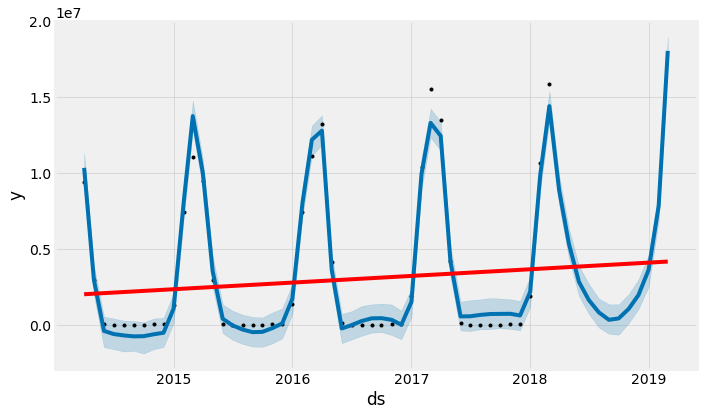

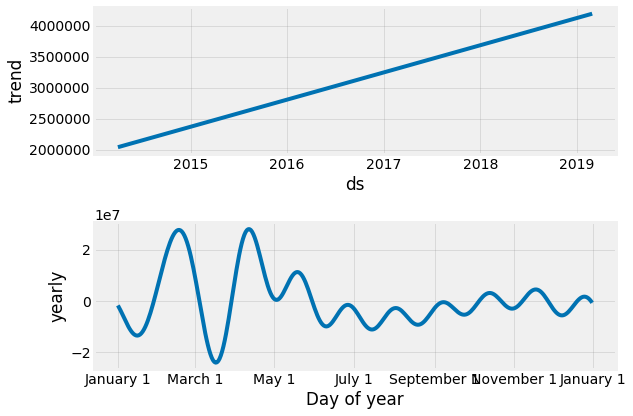

In [148]:
prophet=Prophet(seasonality_mode='additive',weekly_seasonality=False,daily_seasonality=False)
prophet.fit(df_prophet[df_prophet['ds'] <= pd.to_datetime('2018-03-01')])
future = prophet.make_future_dataframe(periods=12, freq= 'M')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

In [149]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,2.040176e+06,9.390985e+06,1.134048e+07,2.040176e+06,2.040176e+06,8.315791e+06,8.315791e+06,8.315791e+06,8.315791e+06,8.315791e+06,8.315791e+06,0.0,0.0,0.0,1.035597e+07
1,2014-05-01,2.076087e+06,2.002258e+06,3.913323e+06,2.076087e+06,2.076087e+06,9.168421e+05,9.168421e+05,9.168421e+05,9.168421e+05,9.168421e+05,9.168421e+05,0.0,0.0,0.0,2.992929e+06
2,2014-06-01,2.113194e+06,-1.442857e+06,5.674569e+05,2.113194e+06,2.113194e+06,-2.485065e+06,-2.485065e+06,-2.485065e+06,-2.485065e+06,-2.485065e+06,-2.485065e+06,0.0,0.0,0.0,-3.718702e+05
3,2014-07-01,2.149105e+06,-1.569459e+06,4.364885e+05,2.149105e+06,2.149105e+06,-2.729206e+06,-2.729206e+06,-2.729206e+06,-2.729206e+06,-2.729206e+06,-2.729206e+06,0.0,0.0,0.0,-5.801006e+05
4,2014-08-01,2.186212e+06,-1.730260e+06,3.013421e+05,2.186212e+06,2.186212e+06,-2.857299e+06,-2.857299e+06,-2.857299e+06,-2.857299e+06,-2.857299e+06,-2.857299e+06,0.0,0.0,0.0,-6.710865e+05
5,2014-09-01,2.223320e+06,-1.683089e+06,2.755965e+05,2.223320e+06,2.223320e+06,-2.955693e+06,-2.955693e+06,-2.955693e+06,-2.955693e+06,-2.955693e+06,-2.955693e+06,0.0,0.0,0.0,-7.323731e+05
6,2014-10-01,2.259231e+06,-1.857422e+06,1.971129e+05,2.259231e+06,2.259231e+06,-2.979275e+06,-2.979275e+06,-2.979275e+06,-2.979275e+06,-2.979275e+06,-2.979275e+06,0.0,0.0,0.0,-7.200445e+05
7,2014-11-01,2.296338e+06,-1.578046e+06,4.419685e+05,2.296338e+06,2.296338e+06,-2.891021e+06,-2.891021e+06,-2.891021e+06,-2.891021e+06,-2.891021e+06,-2.891021e+06,0.0,0.0,0.0,-5.946825e+05
8,2014-12-01,2.332249e+06,-1.425164e+06,4.853445e+05,2.332249e+06,2.332249e+06,-2.827327e+06,-2.827327e+06,-2.827327e+06,-2.827327e+06,-2.827327e+06,-2.827327e+06,0.0,0.0,0.0,-4.950783e+05
9,2015-01-01,2.369356e+06,1.502475e+05,2.094822e+06,2.369356e+06,2.369356e+06,-1.273471e+06,-1.273471e+06,-1.273471e+06,-1.273471e+06,-1.273471e+06,-1.273471e+06,0.0,0.0,0.0,1.095885e+06


In [150]:
rmse = mean_squared_error(test['sales'],forecast.tail(15)['yhat'])
print(rmse)

3687559184073.8716


In [151]:
resultsDf_8_6 = pd.DataFrame({'Test RMSE': [rmse],}
                           ,index=['Prophet'])

resultsDf = pd.concat([resultsDf, resultsDf_8_6])
resultsDf

,Test RMSE,Test MAPE
Simple Average,6.557724e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",7.794320e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",6.666789e+06,inf
"Alpha=0.6,Beta=0.8,DoubleExponentialSmoothing",6.625123e+06,inf
"Alpha=0.0403,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",2.228528e+06,inf
"Alpha=0.1,Beta=0.2,Gamma=1.0,TripleExponentialSmoothing",1.733336e+06,inf
"ARIMA(2,0,0)",inf,inf
"SARIMA(0,0,0)(0,0,3)12",6.952070e+13,inf
"SARIMA(1,0,3)(0,0,3)6",6.952070e+13,inf
"SARIMA(0,0,0)(0,0,3)12",6.163777e+13,100.0


In [139]:
resultsDf.sort_values(by=['Test RMSE'],ascending=True)

,Test RMSE,Test MAPE
"Alpha=0.1,Beta=0.2,Gamma=1.0,TripleExponentialSmoothing",1.136202e+06,inf
"Alpha=0.5353,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.716386e+06,inf
"Alpha=0.6,Beta=0.7,DoubleExponentialSmoothing",3.387137e+06,inf
Simple Average,3.444227e+06,NaN
"Alpha=0.1,SimpleExponentialSmoothing",3.486141e+06,inf
"Alpha=0.995,SimpleExponentialSmoothing",4.009218e+06,inf
"SARIMA(0,1,0)(0,1,2)12",1.746650e+12,inf
"SARIMA(0,1,0)(3,1,0)6",1.775375e+13,inf
"ARIMA(2,1,1)",inf,inf


In [143]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from fbprophet.plot import add_changepoints_to_plot

In [144]:
Coc_Coo.head()

,product,city,sales
Date,,,
2014-04-01,coolers,Cochin,3829083
2014-05-01,coolers,Cochin,1207892
2014-06-01,coolers,Cochin,35105
2014-07-01,coolers,Cochin,0
2014-08-01,coolers,Cochin,0


In [145]:
df_prophet = pd.DataFrame()
df_prophet['ds'] = pd.to_datetime(Coc_Coo1['date'])
df_prophet['y'] = Coc_Coo1['sales']
df_prophet.tail()

,ds,y
Date,,
2017-11-01,2017-11-01,52846
2017-12-01,2017-12-01,48785
2018-01-01,2018-01-01,1033876
2018-02-01,2018-02-01,5654514
2018-03-01,2018-03-01,8437645


In [146]:
df_prophet.shape

(48, 2)

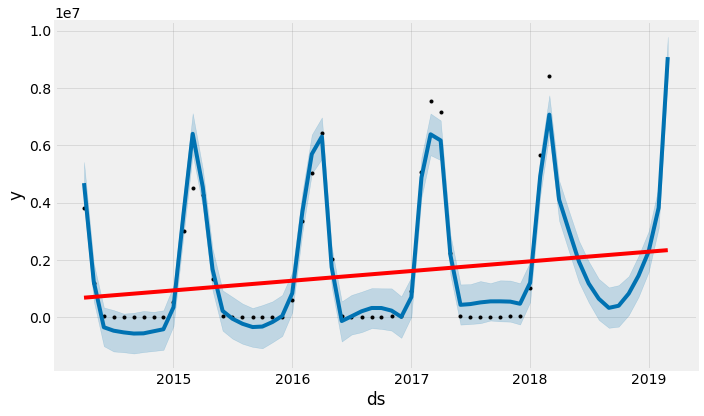

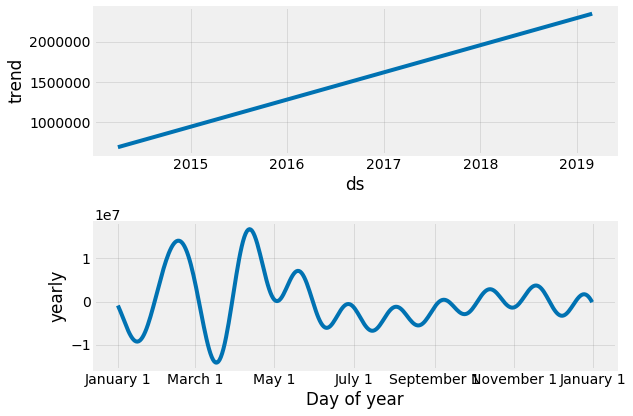

In [147]:
prophet=Prophet(seasonality_mode='additive',weekly_seasonality=False,daily_seasonality=False)
prophet.fit(df_prophet[df_prophet['ds'] <= pd.to_datetime('2018-03-01')])
future = prophet.make_future_dataframe(periods=12, freq= 'M')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()

In [148]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,6.904277e+05,3.936300e+06,5.419745e+06,6.904277e+05,6.904277e+05,3.995271e+06,3.995271e+06,3.995271e+06,3.995271e+06,3.995271e+06,3.995271e+06,0.0,0.0,0.0,4.685699e+06
1,2014-05-01,7.181511e+05,5.659324e+05,1.881039e+06,7.181511e+05,7.181511e+05,5.279632e+05,5.279632e+05,5.279632e+05,5.279632e+05,5.279632e+05,5.279632e+05,0.0,0.0,0.0,1.246114e+06
2,2014-06-01,7.467987e+05,-9.985917e+05,3.480394e+05,7.467987e+05,7.467987e+05,-1.087397e+06,-1.087397e+06,-1.087397e+06,-1.087397e+06,-1.087397e+06,-1.087397e+06,0.0,0.0,0.0,-3.405982e+05
3,2014-07-01,7.745222e+05,-1.183906e+06,2.574252e+05,7.745222e+05,7.745222e+05,-1.234753e+06,-1.234753e+06,-1.234753e+06,-1.234753e+06,-1.234753e+06,-1.234753e+06,0.0,0.0,0.0,-4.602304e+05
4,2014-08-01,8.031698e+05,-1.210318e+06,1.348205e+05,8.031698e+05,8.031698e+05,-1.322804e+06,-1.322804e+06,-1.322804e+06,-1.322804e+06,-1.322804e+06,-1.322804e+06,0.0,0.0,0.0,-5.196343e+05
5,2014-09-01,8.318174e+05,-1.254628e+06,1.637887e+05,8.318174e+05,8.318174e+05,-1.391670e+06,-1.391670e+06,-1.391670e+06,-1.391670e+06,-1.391670e+06,-1.391670e+06,0.0,0.0,0.0,-5.598528e+05
6,2014-10-01,8.595408e+05,-1.205096e+06,2.272995e+05,8.595408e+05,8.595408e+05,-1.412510e+06,-1.412510e+06,-1.412510e+06,-1.412510e+06,-1.412510e+06,-1.412510e+06,0.0,0.0,0.0,-5.529697e+05
7,2014-11-01,8.881884e+05,-1.166765e+06,1.962913e+05,8.881884e+05,8.881884e+05,-1.368297e+06,-1.368297e+06,-1.368297e+06,-1.368297e+06,-1.368297e+06,-1.368297e+06,0.0,0.0,0.0,-4.801090e+05
8,2014-12-01,9.159119e+05,-1.129039e+06,2.498080e+05,9.159119e+05,9.159119e+05,-1.326513e+06,-1.326513e+06,-1.326513e+06,-1.326513e+06,-1.326513e+06,-1.326513e+06,0.0,0.0,0.0,-4.106008e+05
9,2015-01-01,9.445594e+05,-2.969494e+05,1.117420e+06,9.445594e+05,9.445594e+05,-5.883022e+05,-5.883022e+05,-5.883022e+05,-5.883022e+05,-5.883022e+05,-5.883022e+05,0.0,0.0,0.0,3.562573e+05


In [149]:
rmse = mean_squared_error(test['sales'],forecast.tail(15)['yhat'])
print(rmse)

1590436047182.911


In [150]:
resultsDf_8_6 = pd.DataFrame({'Test RMSE': [rmse],}
                           ,index=['Prophet'])

resultsDf = pd.concat([resultsDf, resultsDf_8_6])
resultsDf

,Test RMSE,Test MAPE
Simple Average,3.444227e+06,NaN
"Alpha=0.995,SimpleExponentialSmoothing",4.009218e+06,inf
"Alpha=0.1,SimpleExponentialSmoothing",3.486141e+06,inf
"Alpha=0.6,Beta=0.7,DoubleExponentialSmoothing",3.387137e+06,inf
"Alpha=0.5353,Beta=0.0001,Gamma=0.0001,TripleExponentialSmoothing",1.716386e+06,inf
"Alpha=0.1,Beta=0.2,Gamma=1.0,TripleExponentialSmoothing",1.136202e+06,inf
"ARIMA(2,1,1)",inf,inf
"SARIMA(0,1,0)(3,1,0)6",1.775375e+13,inf
"SARIMA(0,1,0)(0,1,2)12",1.746650e+12,inf
Prophet,1.590436e+12,NaN


In [151]:
import fbprophet

In [152]:
m = fbprophet.Prophet()

In [153]:
m.fit(df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [154]:
future = m.make_future_dataframe(periods=365)

In [155]:
forecast = m.predict(future)

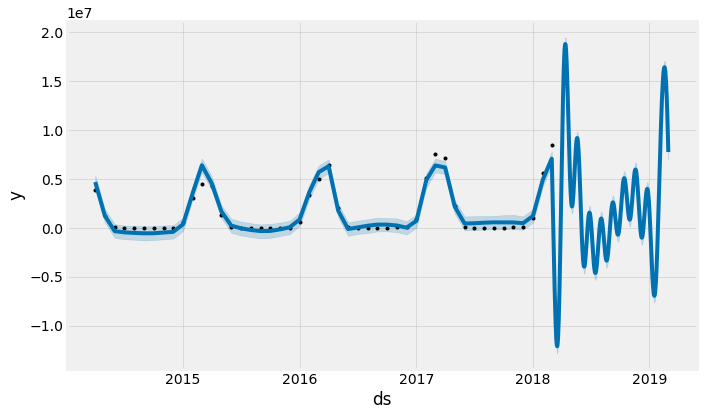

In [156]:
m.plot(forecast);

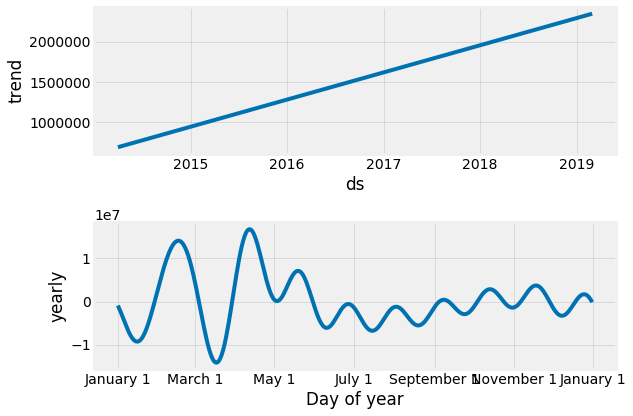

In [157]:
m.plot_components(forecast);

In [158]:
df_prophet.head()

,ds,y
Date,,
2014-04-01,2014-04-01,3829083
2014-05-01,2014-05-01,1207892
2014-06-01,2014-06-01,35105
2014-07-01,2014-07-01,0
2014-08-01,2014-08-01,0


In [159]:
future.tail()

,ds
408,2019-02-25
409,2019-02-26
410,2019-02-27
411,2019-02-28
412,2019-03-01


In [160]:
predict=m.predict(future)

In [161]:
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-04-01,6.904277e+05,4.046936e+06,5.391785e+06,6.904277e+05,6.904277e+05,3.995271e+06,3.995271e+06,3.995271e+06,3.995271e+06,3.995271e+06,3.995271e+06,0.0,0.0,0.0,4.685699e+06
1,2014-05-01,7.181511e+05,5.073775e+05,1.998394e+06,7.181511e+05,7.181511e+05,5.279632e+05,5.279632e+05,5.279632e+05,5.279632e+05,5.279632e+05,5.279632e+05,0.0,0.0,0.0,1.246114e+06
2,2014-06-01,7.467987e+05,-1.093789e+06,3.481809e+05,7.467987e+05,7.467987e+05,-1.087397e+06,-1.087397e+06,-1.087397e+06,-1.087397e+06,-1.087397e+06,-1.087397e+06,0.0,0.0,0.0,-3.405982e+05
3,2014-07-01,7.745222e+05,-1.248258e+06,2.780392e+05,7.745222e+05,7.745222e+05,-1.234753e+06,-1.234753e+06,-1.234753e+06,-1.234753e+06,-1.234753e+06,-1.234753e+06,0.0,0.0,0.0,-4.602304e+05
4,2014-08-01,8.031698e+05,-1.198923e+06,1.380100e+05,8.031698e+05,8.031698e+05,-1.322804e+06,-1.322804e+06,-1.322804e+06,-1.322804e+06,-1.322804e+06,-1.322804e+06,0.0,0.0,0.0,-5.196343e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2019-02-25,2.345520e+06,1.175688e+07,1.321469e+07,2.345520e+06,2.345520e+06,1.014149e+07,1.014149e+07,1.014149e+07,1.014149e+07,1.014149e+07,1.014149e+07,0.0,0.0,0.0,1.248701e+07
409,2019-02-26,2.346444e+06,1.075875e+07,1.218948e+07,2.346444e+06,2.346444e+06,9.108588e+06,9.108588e+06,9.108588e+06,9.108588e+06,9.108588e+06,9.108588e+06,0.0,0.0,0.0,1.145503e+07
410,2019-02-27,2.347368e+06,9.639169e+06,1.096286e+07,2.347368e+06,2.347369e+06,7.969103e+06,7.969103e+06,7.969103e+06,7.969103e+06,7.969103e+06,7.969103e+06,0.0,0.0,0.0,1.031647e+07
411,2019-02-28,2.348293e+06,8.317003e+06,9.767456e+06,2.348292e+06,2.348293e+06,6.731284e+06,6.731284e+06,6.731284e+06,6.731284e+06,6.731284e+06,6.731284e+06,0.0,0.0,0.0,9.079576e+06


In [162]:
predict[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2014-04-01,4.685699e+06,4.046936e+06,5.391785e+06
1,2014-05-01,1.246114e+06,5.073775e+05,1.998394e+06
2,2014-06-01,-3.405982e+05,-1.093789e+06,3.481809e+05
3,2014-07-01,-4.602304e+05,-1.248258e+06,2.780392e+05
4,2014-08-01,-5.196343e+05,-1.198923e+06,1.380100e+05


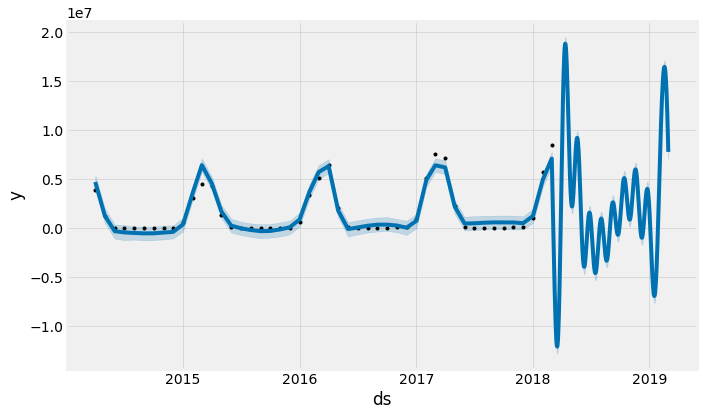

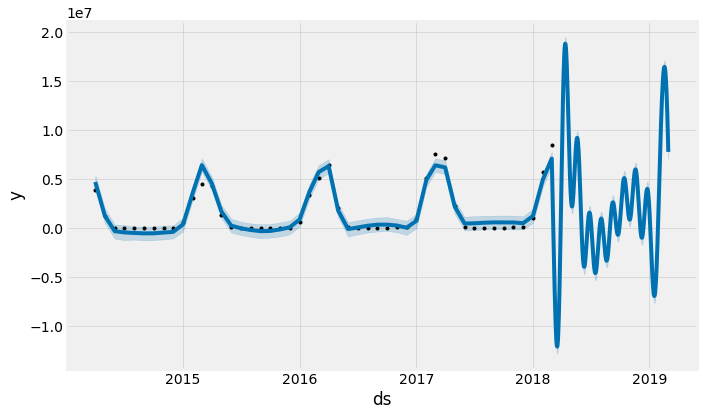

In [163]:
m.plot(predict)

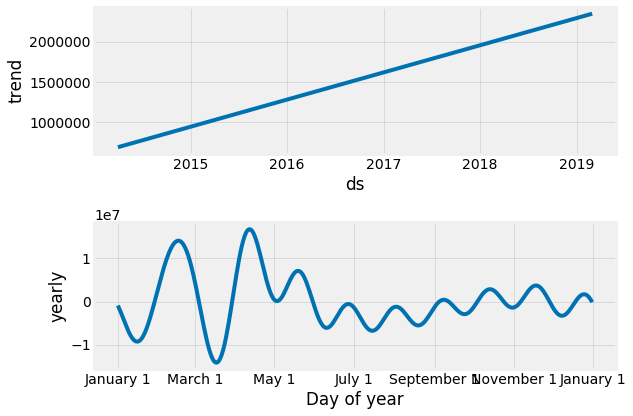

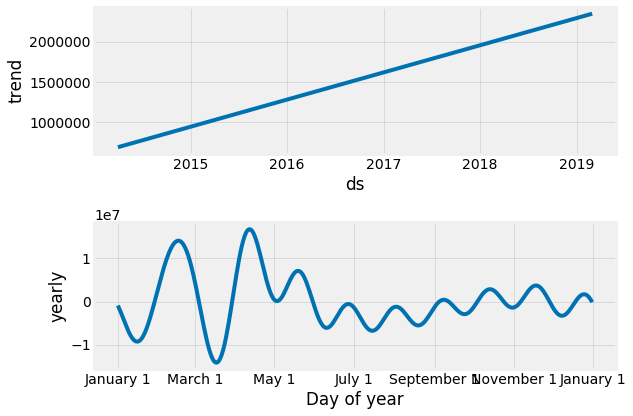

In [164]:
m.plot_components(predict)

In [165]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:fbprophet:Making 2 forecasts with cutoffs between 2016-09-02 00:00:00 and 2017-03-01 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


In [166]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-10-01,8.668454e+05,6.403159e+05,1.092502e+06,8718,2016-09-02
1,2016-11-01,9.593323e+05,7.246253e+05,1.186325e+06,47353,2016-09-02
2,2016-12-01,8.081331e+05,5.677372e+05,1.036907e+06,43714,2016-09-02
3,2017-01-01,8.553603e+05,6.193221e+05,1.095079e+06,926407,2016-09-02
4,2017-02-01,2.075046e+06,1.845767e+06,2.313494e+06,5066739,2016-09-02


In [167]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,31 days,1.275019e+12,1.129167e+06,1.102424e+06,49.309783,0.0
1,60 days,1.322681e+12,1.150079e+06,1.129350e+06,9.723526,0.0
2,61 days,4.175873e+11,6.462100e+05,4.854360e+05,9.642606,0.5
3,90 days,2.939024e+11,5.421277e+05,4.116558e+05,8.756436,0.5
4,92 days,4.671469e+11,6.834814e+05,6.779955e+05,13.244522,0.0


model = ARIMA(Ban_Mix['sales'], order=(1,1,2))
try:
    model_fit = model.fit()
except:
    pass
output = model_fit.forecast(12)
yhat = output[0]
print(model_fit.summary())

In [168]:
fullmodel1 = ExponentialSmoothing(Coc_Coo['sales'],
                                  trend='additive',
                                  seasonal='Additive').fit(smoothing_level=0.1,
                                                                 smoothing_slope=0.2,
                                                                 smoothing_seasonal=1.0)

In [169]:
RMSE_fullmodel1 = metrics.mean_squared_error(Coc_Coo['sales'],fullmodel1.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel1)

RMSE: 535082.6315828861


In [170]:
# Getting the predictions for the same number of times stamps that are present in the test data
prediction_1 = fullmodel1.forecast(steps=24)

In [171]:
Che_Coo.plot()
prediction_1.plot();

NameError: name 'Che_Coo' is not defined

In [172]:
#In the below code, we have calculated the upper and lower confidence bands at 95% confidence level
#Here we are taking the multiplier to be 1.96 as we want to plot with respect to a 95% confidence intervals.
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
2018-04-01,6.165134e+06,7.224852e+06,8.284571e+06
2018-05-01,1.192985e+06,2.252703e+06,3.312421e+06
2018-06-01,-1.028825e+06,3.089310e+04,1.090611e+06
2018-07-01,-1.094606e+06,-3.488810e+04,1.024830e+06
2018-08-01,-1.084858e+06,-2.514004e+04,1.034578e+06


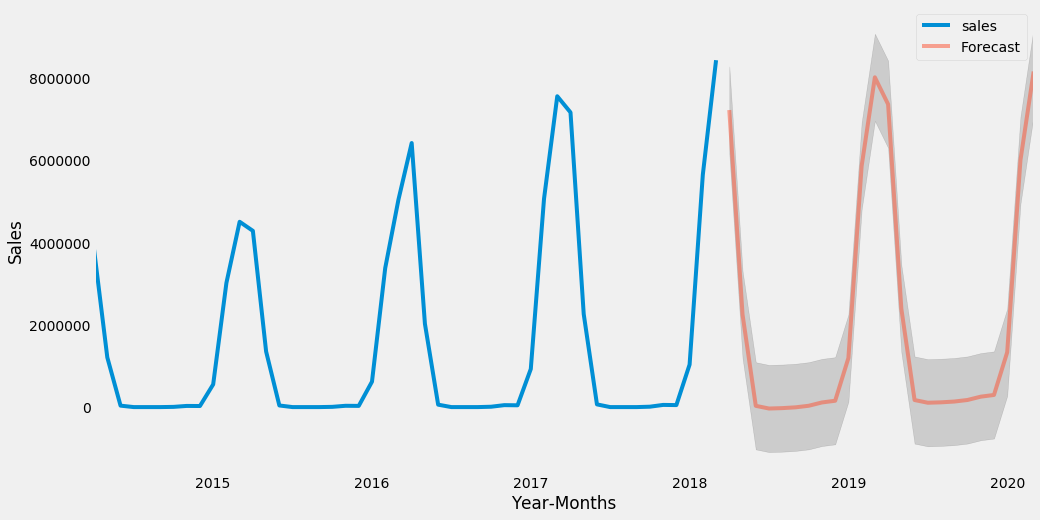

In [173]:
# plot the forecast along with the confidence band

axis = Coc_Coo.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.grid()
plt.show()